<a href="https://colab.research.google.com/github/AbakirH/CS301_Project_Group7/blob/main/CS301_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Members: Abakir Hanna, Edel Barcenas, Gabriela Banayotti

Related Work (10%): Discuss published work that relates to your project. How is your approach similar or different from others?



Data (10%): Describe the data you are working with for your project. What type of data is it? Where did it come from? How much data are you working with? Did you have to do any preprocessing, filtering, or other special treatment to use this data in your project?



Methods (30%): Discuss your approach for solving the problems that you set up in the introduction. Why is your approach the right thing to do? Did you consider alternative approaches? You should demonstrate that you have applied ideas and skills built up during the quarter to tackling your problem of choice. It may be helpful to include figures, diagrams, or tables to describe your method or compare it with other methods.



Experiments (30%): Discuss the experiments that you performed to demonstrate that your approach solves the problem. The exact experiments will vary depending on the project, but you might compare with previously published methods, perform an ablation study to determine the impact of various components of your system, experiment with different hyperparameters or architectural choices, use visualization techniques to gain insight into how your model works, discuss common failure modes of your model, etc. You should include graphs, tables, or other figures to illustrate your experimental results.


Conclusion (5%) Summarize your key results - what have you learned? Suggest ideas for future extensions or new applications of your ideas.

#Abstract



The problem we are working on is to figure out how accurately we can predict the March Madness NCAA Men’s basketball bracket. This problem is very interesting because in basketball the amount of data available is immense. It would only make sense that our approach to this problem should be using XGBoost which uses as many features as we feed the system to create a gradient-boosted decision tree. The reason we decided to use XGBoost is that it allows us to make weak decision trees into strong ones by combining them to create a strong model. Also, these trees are built in parallel allowing us to speed up our computational speed and calculate the results faster. We have 2463 rows of data of games that happened in 7 years to use to predict the results of a tournament that is a month-long with 64 teams. It was also important to experiment with different features to see what model results in us the best prediction for the tournament. The best prediction we got was 71% accuracy when we fed the model the data about the team ranking from the data set that we created for the 2021 NCAA March Madness tournament. The best overall mean score that we got was 67% when we used a plethora of data described below for all the seasons between 2016-2021.


#Intoduction

The NCAA March Madness is an annual, single elimination, American, College Basketball tournament. It consists of a 64 team bracket. The goal of this paper is to accurately predict the winner of any game within the tournament, and potentially(although unlikely) the entire bracket. Why bother predicting the outcome of a basketball tournament? With 10’s of millions of viewers, 18 million just for the final game, there is substantial financial insensitivity in the betting realm. An accurate \$1 bet that predicts the entire bracket for the 32 teams left after the first round pays out $15,000,000. A semi-accurate model can be very lucrative. We expect to get results that are between 0.50 and .80 percent accuracy for when we train our model, because even though statistically a team is supposed to win does not mean they do. We will use the results of past tournaments and see how accurately we can predict them before we try to predict this year’s tournament. The higher we score we will know we picked the right results. If we are able to completely predict a tournament outcome would be an amazing sight to see. Our task to predict what is the percetage that we think this team will beat this other team in the march madness bracket at each level using the data we have.


#Related Work

The best way to learn on how to takle any problem is take a look at how previous winners of this kaggle project decide how other people went about solving this problem. The three winners of this years project either used XGBoost or used the LightGBM model. LightGBM is a gradient boosting framework that uses tree based learning algorithms. The person that won fifth place used CatBoost which is a high-performance open source library for gradient boosting on decision trees. Therefore it seems as the best way to go about this problem is to figure a way to optimize decision trees and try to use them to optimize our predictions on what teams are going to win. I also took inspiration from this [kaggle project ](https://www.kaggle.com/code/theoviel/using-last-year-s-2nd-place/notebook) on how they decided what information was important for NCAA basketball games. This allowed me to see what other data I might want to use to process for my dataset. Another think to consider is how hard it is to predict a perfect bracket for the NCAA tournment. According to this [article](https://www.fastcompany.com/90734778/mathematicians-explain-why-predictive-algorithms-still-wont-get-you-a-perfect-march-madness-bracket) to get your bracket to the sweet 16 is about 1 in 280,000,000,000,000. That number is in the trillions and the biggest problem are teams that upset major teams. For example, this year Saint Peter's Peacocks got all the way to the round of 8 and they were seaded as the 16th team in their division. The probability of that happening is very low considering they had to beat the team that was in 1st place. 

#Data

The data being used comes form /content/kaggle/mens-march-mania-2022. This includes results from March Madness Events dating back to 1986. However, a lot has changed since then in terms of how many teams their are and how the rules of the tournment. Therefore we decided it was best to only use data after 2004 to train our model and test our predictions on tournments only played from 2016 to 2021. The three files we thought it was best to use were season data sheet, the team's seeds sheet and the team's rating system sheet. This allows us to get pretty good results later on and allows us to calculate more data later on if needed such as Win to Loss ratio or the difference betweeen team's scores. 

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import keras
keras.__version__

'2.8.0'

In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abakirhanna","key":"7b47ec063ed3d688514c9878a5c78b24"}'}

In [ ]:
!mkdir /root/.kaggle/
!mv kaggle.json /root/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
!kaggle -v

Kaggle API 1.5.12


In [ ]:
%ls /root/.kaggle/

kaggle.json


In [ ]:
!kaggle competitions files -c mens-march-mania-2022

name                                                    size  creationDate         
-----------------------------------------------------  -----  -------------------  
MDataFiles_Stage2/MGameCities.csv                        2MB  2022-03-14 21:29:06  
MDataFiles_Stage2/MNCAATourneyCompactResults.csv        68KB  2022-03-14 21:29:06  
MDataFiles_Stage2/MSecondaryTourneyTeams.csv            24KB  2022-03-14 21:29:06  
MDataFiles_Stage2/MTeamSpellings.csv                    22KB  2022-03-14 21:29:06  
MDataFiles_Stage2/MNCAATourneySeedRoundSlots.csv        14KB  2022-03-14 21:29:06  
MDataFiles_Stage2/Cities.csv                             9KB  2022-03-14 21:29:06  
MDataFiles_Stage2/MTeamConferences.csv                 207KB  2022-03-14 21:29:06  
MDataFiles_Stage2/MRegularSeasonCompactResults.csv       5MB  2022-03-14 21:29:06  
MDataFiles_Stage2/MTeamCoaches.csv                     362KB  2022-03-14 21:29:06  
MDataFiles_Stage2/MNCAATourneySeeds.csv                 36KB  2022-03-14 21:

In [ ]:
!kaggle competitions download  -c mens-march-mania-2022 -p /content/kaggle/mens-march-mania-2022 

 76% 35.0M/45.8M [00:00<00:00, 66.4MB/s]
100% 45.8M/45.8M [00:00<00:00, 70.3MB/s]


In [ ]:
#We need to upload our own ranking system data csv, because the one provided in the competition is not friendly to play with 

from google.colab import files

files.upload()

Saving 538ratingsMen.csv to 538ratingsMen.csv


{'538ratingsMen.csv': b"Season,TeamID,TeamName,538rating\n2016,1242,Kansas,94.46\n2016,1314,North Carolina,93.94\n2016,1438,Virginia,92.46\n2016,1277,Michigan State,91.84\n2016,1328,Oklahoma,89.96\n2016,1437,Villanova,91.29\n2016,1246,Kentucky,90.69\n2016,1452,West Virginia,89.3\n2016,1345,Purdue,88.68\n2016,1332,Oregon,88\n2016,1401,Texas A&M,86.82\n2016,1112,Arizona,89.04\n2016,1462,Xavier,87.73\n2016,1181,Duke,87.33\n2016,1268,Maryland,87.37\n2016,1231,Indiana,87.36\n2016,1274,Miami (FL),87.05\n2016,1235,Iowa State,86.5\n2016,1124,Baylor,85.47\n2016,1400,Texas,84.66\n2016,1428,Utah,86.64\n2016,1455,Wichita State,86.59\n2016,1234,Iowa,85.91\n2016,1435,Vanderbilt,85.59\n2016,1143,California,85.62\n2016,1211,Gonzaga,85.96\n2016,1458,Wisconsin,84.75\n2016,1323,Notre Dame,84.36\n2016,1163,Connecticut,85.32\n2016,1153,Cincinnati,83.7\n2016,1139,Butler,84.17\n2016,1371,Seton Hall,84.46\n2016,1433,Virginia Commonwealth,83.05\n2016,1173,Dayton,82.37\n2016,1393,Syracuse,82.69\n2016,1338,Pitts

In [ ]:
import os, shutil

!ls /content/kaggle/mens-march-mania-2022


538ratingsMen.csv  MDataFiles_Stage2
MDataFiles_Stage1  mens-march-mania-2022.zip


In [ ]:
!unzip -q /content/kaggle/mens-march-mania-2022/mens-march-mania-2022.zip -d /content/kaggle/mens-march-mania-2022


replace /content/kaggle/mens-march-mania-2022/MDataFiles_Stage1/Cities.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/kaggle/mens-march-mania-2022/MDataFiles_Stage1/Conferences.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/kaggle/mens-march-mania-2022/MDataFiles_Stage1/MConferenceTourneyGames.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/kaggle/mens-march-mania-2022/MDataFiles_Stage1/MGameCities.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/kaggle/mens-march-mania-2022/MDataFiles_Stage1/MMasseyOrdinals.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/kaggle/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyCompactResults.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/kaggle/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!ls /content/kaggle/mens-march-mania-2022
!mv 538ratingsMen.csv /content/kaggle/mens-march-mania-2022

538ratingsMen.csv  MDataFiles_Stage2
MDataFiles_Stage1  mens-march-mania-2022.zip
mv: cannot stat '538ratingsMen.csv': No such file or directory


In [ ]:
import jax.numpy as jnp
import pandas as pd 
import re 

In [ ]:
!ls /content/kaggle/mens-march-mania-2022

538ratingsMen.csv  MDataFiles_Stage2
MDataFiles_Stage1  mens-march-mania-2022.zip


These are the csv files that we need for our data minipulation. We need the season data to get meangiful data such as how many games won by each team  and how many point each team scores each season. Also what are the team's seeds for the march madness tournment. Also, we need the ranking of each team to see how many times an underdog would beat a high ran

In [ ]:
season_data = pd.read_csv('/content/kaggle/mens-march-mania-2022/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
team_seeds = pd.read_csv('/content/kaggle/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneySeeds.csv')
rating_system = pd.read_csv('/content/kaggle/mens-march-mania-2022/538ratingsMen.csv')
rating_system.drop('TeamName', axis=1, inplace=True)
rating_system

,Season,TeamID,538rating
0,2016,1242,94.46
1,2016,1314,93.94
2,2016,1438,92.46
3,2016,1277,91.84
4,2016,1328,89.96
...,...,...,...
403,2022,1168,71.78
404,2022,1136,71.55
405,2022,1313,71.39
406,2022,1411,71.14


So calculating how much a team wins by can. help us see how dominate a team is usually. While it is true some games will have close scores other games where a team was seaded very high should always dominate a underfunded and unranked team.

In [ ]:
# Add a new column to know the differnce of points between those who in and lose
def score_difference(data):
    data['ScoreGapBetweenTeamsPlayed'] = data['WScore'] - data['LScore']
    return data.loc[(data['Season'] > 2003)]
  
season_data = score_difference(season_data).reset_index(drop = True)

In [ ]:
season_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,ScoreGapBetweenTeamsPlayed
0,2004,10,1266,52,1385,45,A,0,7
1,2004,10,1448,85,1272,76,N,0,9
2,2004,11,1338,71,1104,62,N,0,9
3,2004,11,1386,73,1211,66,N,0,7
4,2004,12,1227,77,1414,65,N,0,12


In [ ]:
def create_team_list(data, group_list = ['Season', 'WTeamID'], team_id = 'WTeamID'):
    group = data.groupby(group_list).count().reset_index()
    #We only care about the teams that were played in the last 6 years as rules have changes over time
    group = data.loc[(data['Season'] > 2003)]
    group = group[group_list].rename(columns={team_id: "TeamID"})
    return group

winners = create_team_list(season_data, group_list = ['Season', 'WTeamID'], team_id = 'WTeamID')
lossers = create_team_list(season_data, group_list = ['Season', 'LTeamID'], team_id = 'LTeamID')

# Create an empty train dataset that we will fill in ourselvs.
team_agg_features = pd.concat([winners, lossers], axis = 0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop = True)
team_agg_features

,Season,TeamID
0,2004,1102
1,2004,1103
2,2004,1104
3,2004,1105
4,2004,1106
...,...,...
6560,2022,1468
6561,2022,1469
6562,2022,1470
6563,2022,1471


We need to add the ranking of each winning team or losing team for each game played and then also add if the winning team was the underdog for that game. This allows us to later figure out how many times a team was the underdog and won that season.

In [ ]:
season_data = pd.merge(
    season_data,
    rating_system,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'538rating': '538ratingW'})

season_data = pd.merge(
    season_data,
    rating_system,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'538rating': '538ratingL'})

season_data["underDogWon"] = season_data['538ratingL'] > season_data['538ratingW']

In [ ]:
season_data

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,ScoreGapBetweenTeamsPlayed,538ratingW,538ratingL,underDogWon
0,2004,10,1266,52,1385,45,A,0,7,NaN,NaN,False
1,2004,10,1448,85,1272,76,N,0,9,NaN,NaN,False
2,2004,11,1338,71,1104,62,N,0,9,NaN,NaN,False
3,2004,11,1386,73,1211,66,N,0,7,NaN,NaN,False
4,2004,12,1227,77,1414,65,N,0,12,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
95802,2022,98,1400,79,1242,76,H,0,3,86.32,91.27,True
95803,2022,98,1411,66,1126,63,A,0,3,71.14,NaN,False
95804,2022,98,1422,68,1441,49,A,0,19,NaN,NaN,False
95805,2022,98,1438,69,1181,68,A,0,1,NaN,89.28,False


This is were the data becomes intresting as having data for each game does help, but also having general data for each team based on the summation of data for each season would help a lot. Therefore for each season and team ID we will do some manipulation of the data for that season to get a comprensive view of the data for that team and season. Some important stats are the team rating and how many games did a team win while they were considered the underdog. 

In [ ]:

def winner_aggregated_features(df, group_list = ['Season', 'WTeamID']):
    tmp = df.groupby(group_list).agg(NumWins       = ('WTeamID', 'count'), 
                                     AvgWinsGap    = ('ScoreGapBetweenTeamsPlayed', 'mean'),
                                     W_TotalPoints = ('WScore', 'sum'),
                                     W_MaxPoints   = ('WScore', 'max'),
                                     W_MinPoints   = ('WScore', 'min'),
                                     W_538rating = ('538ratingL', 'max'),
                                     underDogWin = ("underDogWon", 'sum')
                                    )
    tmp = tmp.reset_index()
    tmp = tmp.rename(columns={"WTeamID": "TeamID"})
    
    return tmp

def losser_aggregated_features(df, group_list = ['Season', 'LTeamID']):
    tmp = df.groupby(group_list).agg(NumLosses       = ('LTeamID', 'count'), 
                                     AvgLossesGap    = ('ScoreGapBetweenTeamsPlayed', 'mean'),
                                     L_TotalPoints = ('LScore', 'sum'),
                                     L_MaxPoints   = ('LScore', 'max'),
                                     L_MinPoints   = ('LScore', 'min'),
                                     L_538rating = ('538ratingL', 'max'),
                                     underDogWin = ("underDogWon", 'sum')
                                    )
    tmp = tmp.reset_index()
    tmp = tmp.rename(columns={"LTeamID": "TeamID"})
    return tmp
  
winner_team_aggregation = winner_aggregated_features(season_data)
losser_team_aggregation = losser_aggregated_features(season_data)


team_agg_features = team_agg_features.merge(winner_team_aggregation, on = ['Season', 'TeamID'], how = 'left')
team_agg_features = team_agg_features.merge(losser_team_aggregation, on = ['Season', 'TeamID'], how = 'left')
team_agg_features.fillna(0, inplace = True) 

team_agg_features

,Season,TeamID,NumWins,AvgWinsGap,W_TotalPoints,W_MaxPoints,W_MinPoints,W_538rating,underDogWin_x,NumLosses,AvgLossesGap,L_TotalPoints,L_MaxPoints,L_MinPoints,L_538rating,underDogWin_y
0,2004,1102,22.0,15.136364,1404.0,86.0,49.0,0.0,0.0,6.0,10.000000,281.0,61.0,35.0,0.0,0.0
1,2004,1103,13.0,9.769231,973.0,96.0,48.0,0.0,0.0,15.0,9.200000,1036.0,83.0,53.0,0.0,0.0
2,2004,1104,17.0,13.470588,1298.0,101.0,45.0,0.0,0.0,12.0,7.583333,796.0,82.0,47.0,0.0,0.0
3,2004,1105,13.0,9.153846,984.0,86.0,61.0,0.0,0.0,16.0,13.937500,1040.0,79.0,41.0,0.0,0.0
4,2004,1106,16.0,12.375000,1087.0,79.0,59.0,0.0,0.0,14.0,12.357143,756.0,70.0,43.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6560,2022,1468,9.0,10.666667,671.0,85.0,66.0,0.0,0.0,11.0,16.545455,661.0,70.0,50.0,0.0,0.0
6561,2022,1469,7.0,11.428571,557.0,85.0,71.0,0.0,0.0,12.0,19.333333,764.0,73.0,50.0,0.0,0.0
6562,2022,1470,8.0,11.125000,565.0,83.0,57.0,0.0,0.0,13.0,11.769231,767.0,84.0,50.0,0.0,0.0
6563,2022,1471,8.0,10.125000,632.0,85.0,71.0,0.0,0.0,12.0,13.416667,710.0,80.0,48.0,0.0,0.0


In [ ]:
def calculate_features(df):
    df['WinRatio'] = df['NumWins'] / (df['NumWins'] + df['NumLosses'])
    df['AvgScoreGap'] = ((df['NumWins'] * df['AvgWinsGap'] - df['NumLosses'] * df['AvgLossesGap']) / (df['NumWins'] + df['NumLosses']))
    df['PointsRatio'] = df['W_TotalPoints'] / (df['L_TotalPoints'] + df['W_TotalPoints'])
    rating = jnp.array(df['W_538rating'].values.tolist())
    df["538rating"] = jnp.where(rating > 0, jnp.array(df['W_538rating']), rating).tolist()
    df["underDogWins"] = df['underDogWin_x'] +df['underDogWin_y']
    return df

team_agg_features = calculate_features(team_agg_features)
team_agg_features = team_agg_features[['Season','TeamID','WinRatio', 'AvgScoreGap','PointsRatio','538rating', 'underDogWins']]

In [ ]:
team_agg_features.loc[team_agg_features["underDogWins"] > 0]

,Season,TeamID,WinRatio,AvgScoreGap,PointsRatio,538rating,underDogWins
4111,2016,1112,0.757576,12.212121,0.767537,85.959999,7.0
4113,2016,1114,0.870968,9.935484,0.875115,79.930000,1.0
4121,2016,1124,0.656250,6.687500,0.703931,86.500000,5.0
4134,2016,1139,0.677419,9.419355,0.736990,88.680000,6.0
4138,2016,1143,0.696970,8.090909,0.724889,89.040001,5.0
...,...,...,...,...,...,...,...
6520,2022,1425,0.826087,9.913043,0.844603,83.489998,1.0
6531,2022,1437,0.739130,11.347826,0.777976,88.870003,6.0
6533,2022,1439,0.583333,8.916667,0.633960,82.099998,2.0
6550,2022,1458,0.818182,4.909091,0.837803,89.099998,6.0


In [ ]:
tournament_data = pd.read_csv('/content/kaggle/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
tournament_data = tournament_data.rename(columns = {'WTeamID' : 'W_TeamID', 'LTeamID' : 'L_TeamID', 'WScore' : 'W_Score', 'LScore' : 'L_Score'})
tournament_data.drop(['NumOT', 'WLoc'], axis = 1, inplace = True)
tournament_data = tournament_data[tournament_data['Season'] > 2003].reset_index(drop = True)
tournament_data.head()


,Season,DayNum,W_TeamID,W_Score,L_TeamID,L_Score
0,2004,134,1197,72,1250,57
1,2004,136,1104,65,1356,64
2,2004,136,1163,70,1436,53
3,2004,136,1177,76,1173,69
4,2004,136,1181,96,1106,61


In [ ]:
tournament_data = pd.merge(tournament_data,team_seeds, how = 'left', left_on = ['Season', 'W_TeamID'], right_on = ['Season', 'TeamID'])
tournament_data = tournament_data.drop('TeamID', axis = 1).rename(columns = {'Seed': 'W_Seed'})


tournament_data = pd.merge(tournament_data,team_seeds, how = 'left',left_on = ['Season', 'L_TeamID'], right_on = ['Season', 'TeamID'])
tournament_data = tournament_data.drop('TeamID', axis = 1).rename(columns = {'Seed': 'L_Seed'})

tournament_data

,Season,DayNum,W_TeamID,W_Score,L_TeamID,L_Score,W_Seed,L_Seed
0,2004,134,1197,72,1250,57,Z16a,Z16b
1,2004,136,1104,65,1356,64,X08,X09
2,2004,136,1163,70,1436,53,X02,X15
3,2004,136,1177,76,1173,69,X07,X10
4,2004,136,1181,96,1106,61,W01,W16
...,...,...,...,...,...,...,...,...
1112,2021,148,1211,85,1425,66,X01,X06
1113,2021,148,1417,51,1276,49,W11b,W01
1114,2021,152,1124,78,1222,59,Z01,Y02
1115,2021,152,1211,93,1417,90,X01,W11b


In [ ]:
def get_seed_number(row):
    return int(re.sub("[^0-9]", "", row))

tournament_data['W_Seed'] = tournament_data['W_Seed'].apply(get_seed_number)
tournament_data['L_Seed'] = tournament_data['L_Seed'].apply(get_seed_number)

In [ ]:
def merge_agg_features(df, agg_features):
    for result in ['W', 'L']:
        df = pd.merge(df, agg_features, how = 'left', left_on = ['Season', result +'_'+ 'TeamID'], right_on = ['Season', 'TeamID'])
        avoid = ['Season', 'TeamID']
        new_names = {col: result +'_'+ col for col in agg_features.columns if col not in avoid}
        df = df.rename(columns = new_names)        
        df = df.drop(columns = 'TeamID', axis = 1)
    return df

tournament_data = merge_agg_features(tournament_data, team_agg_features)

This tournment data is the matchup of each day in the march madness bracket and the associated data we thing each team should need for us to use when predicting who would win each day.

In [ ]:
tournament_data

,Season,DayNum,W_TeamID,W_Score,L_TeamID,L_Score,W_Seed,L_Seed,W_WinRatio,W_AvgScoreGap,W_PointsRatio,W_538rating,W_underDogWins,L_WinRatio,L_AvgScoreGap,L_PointsRatio,L_538rating,L_underDogWins
0,2004,134,1197,72,1250,57,16,16,0.466667,-1.866667,0.497920,0.000000,0.0,0.642857,2.178571,0.659978,0.000000,0.0
1,2004,136,1104,65,1356,64,8,9,0.586207,4.758621,0.619866,0.000000,0.0,0.862069,8.379310,0.879536,0.000000,0.0
2,2004,136,1163,70,1436,53,2,15,0.818182,15.151515,0.847510,0.000000,0.0,0.733333,4.300000,0.757530,0.000000,0.0
3,2004,136,1177,76,1173,69,7,10,0.700000,3.200000,0.716839,0.000000,0.0,0.750000,3.875000,0.786667,0.000000,0.0
4,2004,136,1181,96,1106,61,1,16,0.843750,14.781250,0.850705,0.000000,0.0,0.533333,0.833333,0.589799,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,2021,148,1211,85,1425,66,1,6,1.000000,23.000000,1.000000,90.820000,0.0,0.758621,9.655172,0.796587,84.589996,2.0
1113,2021,148,1417,51,1276,49,11,1,0.653846,4.346154,0.684266,86.019997,2.0,0.833333,10.875000,0.868306,90.820000,3.0
1114,2021,152,1124,78,1222,59,1,2,0.916667,17.958333,0.934815,94.019997,3.0,0.884615,18.000000,0.899194,86.430000,1.0
1115,2021,152,1211,93,1417,90,1,11,1.000000,23.000000,1.000000,90.820000,0.0,0.653846,4.346154,0.684266,86.019997,2.0


We have to replace the winner or loser tag of each column in the data because our classifier does not know who won each day and has to predict who won by itself with the data provided in each row.

In [ ]:
def replace_win_loser(df):
    team_a = df.copy()
    team_b = df.copy()
    
    team_a_dict, team_b_dict = {}, {}
    
    for col in team_a.columns:
        if col.find('W_') == 0:
            new_col_name = str(col).replace('W_', 'A_')
            team_a_dict[col] = new_col_name
        if col.find('L_') == 0:
            new_col_name = col.replace('L_', 'B_')    
            team_a_dict[col] = new_col_name
            
    for col in team_b.columns:
        if col.find('W_') == 0:
            new_col_name = str(col).replace('W_', 'B_')
            team_b_dict[col] = new_col_name
        if col.find('L_') == 0:
            new_col_name = col.replace('L_', 'A_')
            team_b_dict[col] = new_col_name

    team_a = team_a.rename(columns = team_a_dict)
    team_b = team_b.rename(columns = team_b_dict)
    
    merged_df = pd.concat([team_a, team_b], axis = 0, sort = False)
    return merged_df

In [ ]:
tournament_data = replace_win_loser(tournament_data)

In [ ]:
tournament_data

,Season,DayNum,A_TeamID,A_Score,B_TeamID,B_Score,A_Seed,B_Seed,A_WinRatio,A_AvgScoreGap,A_PointsRatio,A_538rating,A_underDogWins,B_WinRatio,B_AvgScoreGap,B_PointsRatio,B_538rating,B_underDogWins
0,2004,134,1197,72,1250,57,16,16,0.466667,-1.866667,0.497920,0.000000,0.0,0.642857,2.178571,0.659978,0.000000,0.0
1,2004,136,1104,65,1356,64,8,9,0.586207,4.758621,0.619866,0.000000,0.0,0.862069,8.379310,0.879536,0.000000,0.0
2,2004,136,1163,70,1436,53,2,15,0.818182,15.151515,0.847510,0.000000,0.0,0.733333,4.300000,0.757530,0.000000,0.0
3,2004,136,1177,76,1173,69,7,10,0.700000,3.200000,0.716839,0.000000,0.0,0.750000,3.875000,0.786667,0.000000,0.0
4,2004,136,1181,96,1106,61,1,16,0.843750,14.781250,0.850705,0.000000,0.0,0.533333,0.833333,0.589799,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,2021,148,1425,66,1211,85,6,1,0.758621,9.655172,0.796587,84.589996,2.0,1.000000,23.000000,1.000000,90.820000,0.0
1113,2021,148,1276,49,1417,51,1,11,0.833333,10.875000,0.868306,90.820000,3.0,0.653846,4.346154,0.684266,86.019997,2.0
1114,2021,152,1222,59,1124,78,2,1,0.884615,18.000000,0.899194,86.430000,1.0,0.916667,17.958333,0.934815,94.019997,3.0
1115,2021,152,1417,90,1211,93,11,1,0.653846,4.346154,0.684266,86.019997,2.0,1.000000,23.000000,1.000000,90.820000,0.0


We want to add more features and some that could help us classify the results better is the difference between differnt results. For example knowing the difference between two team's seed number can tell us who is an underdog or not. Also, the more features we have, it helps us to eventually determine what are good or bad features for the model.

In [ ]:
def calculate_differences(df):
    df['SeedDiff'] = df['A_Seed'] - df['B_Seed']
    df['WinRatioDiff'] = df['A_WinRatio'] - df['B_WinRatio']
    df['GapAvgDiff'] = df['A_AvgScoreGap'] - df['B_AvgScoreGap']    
    df['PointsRatioDiff'] = df['A_PointsRatio'] - df['A_PointsRatio']
    return df

tournament_data = calculate_differences(tournament_data)

In [ ]:
tournament_data['ScoreDiff'] = tournament_data['A_Score'] - tournament_data['B_Score']
tournament_data['A_Win'] = (tournament_data['ScoreDiff'] > 0).astype(int)
tournament_data = tournament_data.drop(columns=['A_Score', 'B_Score'])
tournament_data.head()

,Season,DayNum,A_TeamID,B_TeamID,A_Seed,B_Seed,A_WinRatio,A_AvgScoreGap,A_PointsRatio,A_538rating,...,B_AvgScoreGap,B_PointsRatio,B_538rating,B_underDogWins,SeedDiff,WinRatioDiff,GapAvgDiff,PointsRatioDiff,ScoreDiff,A_Win
0,2004,134,1197,1250,16,16,0.466667,-1.866667,0.497920,0.0,...,2.178571,0.659978,0.0,0.0,0,-0.176190,-4.045238,0.0,15,1
1,2004,136,1104,1356,8,9,0.586207,4.758621,0.619866,0.0,...,8.379310,0.879536,0.0,0.0,-1,-0.275862,-3.620690,0.0,1,1
2,2004,136,1163,1436,2,15,0.818182,15.151515,0.847510,0.0,...,4.300000,0.757530,0.0,0.0,-13,0.084848,10.851515,0.0,17,1
3,2004,136,1177,1173,7,10,0.700000,3.200000,0.716839,0.0,...,3.875000,0.786667,0.0,0.0,-3,-0.050000,-0.675000,0.0,7,1
4,2004,136,1181,1106,1,16,0.843750,14.781250,0.850705,0.0,...,0.833333,0.589799,0.0,0.0,-15,0.310417,13.947917,0.0,35,1


In [ ]:
trainingData = pd.read_csv('/content/kaggle/mens-march-mania-2022/MDataFiles_Stage1/MSampleSubmissionStage1.csv')
tst_data = trainingData.copy()

def separate_id(df):
    df['Season']  = df['ID'].apply(lambda x: int(x.split('_')[0]))
    df['TeamIdA'] = df['ID'].apply(lambda x: int(x.split('_')[1]))
    df['TeamIdB'] = df['ID'].apply(lambda x: int(x.split('_')[2]))
    return df

tst_data = separate_id(tst_data)

In [ ]:
tst_data = pd.merge(tst_data,team_seeds, how = 'left', left_on = ['Season', 'TeamIdA'], right_on = ['Season', 'TeamID'])
tst_data = tst_data.drop('TeamID', axis = 1).rename(columns = {'Seed': 'A_Seed'})

tst_data = pd.merge(tst_data,team_seeds, how = 'left', left_on = ['Season', 'TeamIdB'], right_on = ['Season', 'TeamID'])
tst_data = tst_data.drop('TeamID', axis = 1).rename(columns = {'Seed': 'B_Seed'})


In [ ]:
tst_data

,ID,Pred,Season,TeamIdA,TeamIdB,A_Seed,B_Seed
0,2016_1112_1114,0.5,2016,1112,1114,Y06,X12
1,2016_1112_1122,0.5,2016,1112,1122,Y06,Y16
2,2016_1112_1124,0.5,2016,1112,1124,Y06,Z05
3,2016_1112_1138,0.5,2016,1112,1138,Y06,Y14
4,2016_1112_1139,0.5,2016,1112,1139,Y06,X09
...,...,...,...,...,...,...,...
11385,2021_1452_1457,0.5,2021,1452,1457,Y03,Z12
11386,2021_1452_1458,0.5,2021,1452,1458,Y03,Z09
11387,2021_1455_1457,0.5,2021,1455,1457,X11b,Z12
11388,2021_1455_1458,0.5,2021,1455,1458,X11b,Z09


In [ ]:
tst_data['A_Seed'] = tst_data['A_Seed'].apply(get_seed_number)
tst_data['B_Seed'] = tst_data['B_Seed'].apply(get_seed_number)
tst_data = tst_data.rename(columns = {'TeamIdA': 'A_TeamID', 'TeamIdB': 'B_TeamID'})

In [ ]:
team_agg_features.loc[(team_agg_features['underDogWins'] > 0)]

,Season,TeamID,WinRatio,AvgScoreGap,PointsRatio,538rating,underDogWins
4111,2016,1112,0.757576,12.212121,0.767537,85.959999,7.0
4113,2016,1114,0.870968,9.935484,0.875115,79.930000,1.0
4121,2016,1124,0.656250,6.687500,0.703931,86.500000,5.0
4134,2016,1139,0.677419,9.419355,0.736990,88.680000,6.0
4138,2016,1143,0.696970,8.090909,0.724889,89.040001,5.0
...,...,...,...,...,...,...,...
6520,2022,1425,0.826087,9.913043,0.844603,83.489998,1.0
6531,2022,1437,0.739130,11.347826,0.777976,88.870003,6.0
6533,2022,1439,0.583333,8.916667,0.633960,82.099998,2.0
6550,2022,1458,0.818182,4.909091,0.837803,89.099998,6.0


In [ ]:
def merge_agg_features(df, agg_features):
    for result in ['A', 'B']:
        df = pd.merge(df, agg_features, how = 'left', left_on = ['Season', result +'_'+ 'TeamID'], right_on = ['Season', 'TeamID'])
        avoid = ['Season', 'TeamID']
        new_names = {col: result +'_'+ col for col in agg_features.columns if col not in avoid}
        df = df.rename(columns = new_names)        
        df = df.drop(columns = 'TeamID', axis = 1)
    return df

tst_data = merge_agg_features(tst_data, team_agg_features)

In [ ]:
tst_data = calculate_differences(tst_data)

#Methods & Experiment

Before we decided what method we wanted to run to solve this problem we had to look at what we were given and how we could use it. Since we are given a bunch of data about NCAA basketball teams, we thought it was best to do use the features and do feature selection. However, creating simple trees and using them to train our model would result in many weak trees and hurt our predictions. This is why we decided we would use XGBoost as it's implementation uses more accurate approximations to find the best tree model. XGBoost is a specific implementation of the Gradient Boosting Model and this allows us to control overfitting, which gives it better perfomance.

In [ ]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier

features = [col for col in tournament_data.columns if col not in ['A_TeamID', 'B_TeamID', 'ScoreDiff', 'Season', 'DayNum', 'A_Win']]
print("These are the features our experiment will be tested on")
for feature in features:
  print(feature)

A_Seed
B_Seed
A_WinRatio
A_AvgScoreGap
A_PointsRatio
A_538rating
A_underDogWins
B_WinRatio
B_AvgScoreGap
B_PointsRatio
B_538rating
B_underDogWins
SeedDiff
WinRatioDiff
GapAvgDiff
PointsRatioDiff


Our prediction will be scored on the log loss function as follows:

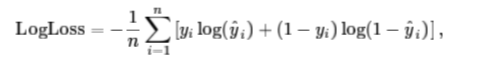





where:

- n is the number of games played

- $\hat{yi}$ is the predicted probability of team 1 beating team 2

- $y_i$  is 1 if team 1 wins, 0 if team 2 wins

- log is the natural logarithm

The use of the logarithm provides extreme punishments for being both confident and wrong. In the worst possible case, a prediction that something is true when it is actually false will add an infinite amount to your error score. In order to prevent this, predictions are bounded away from the extremes by a small value.


In [ ]:
def log_loss_function(y_val, y_pred):
    logLossSum = 0
    for x in range(0,len(y_val)):
        logLossSum += (y_val[x]*jnp.log(y_pred[x]) + (1-y_val[x])*jnp.log(1-y_pred[x]))
        
    logLossSum = -logLossSum/len(y_val)
    return logLossSum

In [ ]:
def kfold_model(train_df, tst_df):
    cvs = []
    preds_test = []
    seasons = train_df['Season'].unique()
    team_AWins = 'A_Win'
    print(seasons)
    for season in seasons[12:]:
        print(f'\nValidating on season {season}')
        X_train = train_df[train_df['Season'] < season][features].reset_index(drop = True).copy()
        X_val = train_df[train_df['Season'] == season][features].reset_index(drop = True).copy()
        
        y_train = train_df[train_df['Season'] < season][team_AWins].reset_index(drop = True).copy()
        y_val = train_df[train_df['Season'] == season][team_AWins].reset_index(drop = True).copy()
        
        tst_dataset = tst_data[features].copy()
        
        
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        
        X_train = scaler.transform(X_train)        
        X_val = scaler.transform(X_val)
        tst_dataset = scaler.transform(tst_dataset)
        
        model = XGBClassifier(n_estimators = 1024, random_state = 85)
        model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 0, early_stopping_rounds = 128)
        
        pred_test = model.predict_proba(tst_dataset)[:, 1]
        preds_test.append(pred_test)
        
        print(len(y_val),len(pred_test))
        loss = log_loss_function(y_val, pred_test)

        cvs.append(loss)
        
        print(f'\t -> Scored {loss:.4f}')
    print(f'\nMean Score Is: {jnp.mean(jnp.array(cvs)):.3f}', '\n')
    return preds_test

In [ ]:
predictions = kfold_model(tournament_data, tournament_data)

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2021]

Validating on season 2016
134 11390
	 -> Scored 0.6371

Validating on season 2017
134 11390
	 -> Scored 0.6253

Validating on season 2018
134 11390
	 -> Scored 0.6291

Validating on season 2019
134 11390
	 -> Scored 0.7150

Validating on season 2021
132 11390
	 -> Scored 0.6308

Mean Score Is: 0.647 



In [ ]:
features = ['A_Seed',
            'B_Seed',
            'A_WinRatio',
            'A_AvgScoreGap',
            'A_PointsRatio',
            'A_538rating',
            'A_underDogWins',
            'B_WinRatio',
            'B_AvgScoreGap',
            'B_PointsRatio',
            'B_538rating',
            'B_underDogWins']
predictions = kfold_model(tournament_data, tournament_data)

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2021]

Validating on season 2016
134 11390
	 -> Scored 0.6733

Validating on season 2017
134 11390
	 -> Scored 0.6563

Validating on season 2018
134 11390
	 -> Scored 0.6154

Validating on season 2019
134 11390
	 -> Scored 0.6670

Validating on season 2021
132 11390
	 -> Scored 0.6596

Mean Score Is: 0.654 



In [ ]:
features = ['SeedDiff',
            'WinRatioDiff',
            'GapAvgDiff',
            'PointsRatioDiff']

In [ ]:
predictions = kfold_model(tournament_data, tournament_data)

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2021]

Validating on season 2016
134 11390
	 -> Scored 0.6052

Validating on season 2017
134 11390
	 -> Scored 0.5687

Validating on season 2018
134 11390
	 -> Scored 0.6355

Validating on season 2019
134 11390
	 -> Scored 0.5634

Validating on season 2021
132 11390
	 -> Scored 0.6063

Mean Score Is: 0.596 



In [ ]:
features = ['A_Seed',
            'B_Seed',
            'A_underDogWins',
            'B_underDogWins',
            'A_538rating',
            'B_538rating']
predictions = kfold_model(tournament_data, tournament_data)

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2021]

Validating on season 2016
134 11390
	 -> Scored 0.6459

Validating on season 2017
134 11390
	 -> Scored 0.6732

Validating on season 2018
134 11390
	 -> Scored 0.6488

Validating on season 2019
134 11390
	 -> Scored 0.6065

Validating on season 2021
132 11390
	 -> Scored 0.7805

Mean Score Is: 0.671 



#Conclusion



In conclusion we see that it is very had to predict a perfect bracket. However, we can get very close with the data provided to us and we can do manipulation at the end to make the prediction of what teams could cause a team to be upsetted if they are a low seat. This can be seen in the example article I linked in the related works page.